In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [7]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,40902.0,1484710.98,257241.30,75151.61,68601.68,-2326540.62,-156.699900,0.281927,0.389560
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,42054.0,1265762.30,212141.83,77268.77,144929.24,-2538278.92,-200.533617,0.256367,0.332741
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,52657.0,1324118.93,182108.20,96750.91,123780.22,-2094184.75,-158.156847,0.280977,0.387361
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,82439.0,1842448.61,169169.36,151475.73,257032.07,-1418749.33,-77.003468,0.408757,0.564961
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,41193.0,1292960.07,205598.93,75686.66,257032.07,-1730245.94,-133.820524,0.298264,0.427678


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,9.644833e+02,3653.800773,0.00,3.000000,57.000000,531.000000,1.220090e+05
TotalSalesDollars,10692.0,1.291513e+04,51175.342958,0.00,59.960000,1175.545000,8311.662500,1.842449e+06
TotalSalesPrice,10692.0,6.209948e+03,15980.508029,0.00,16.990000,598.640000,4775.227500,2.572413e+05


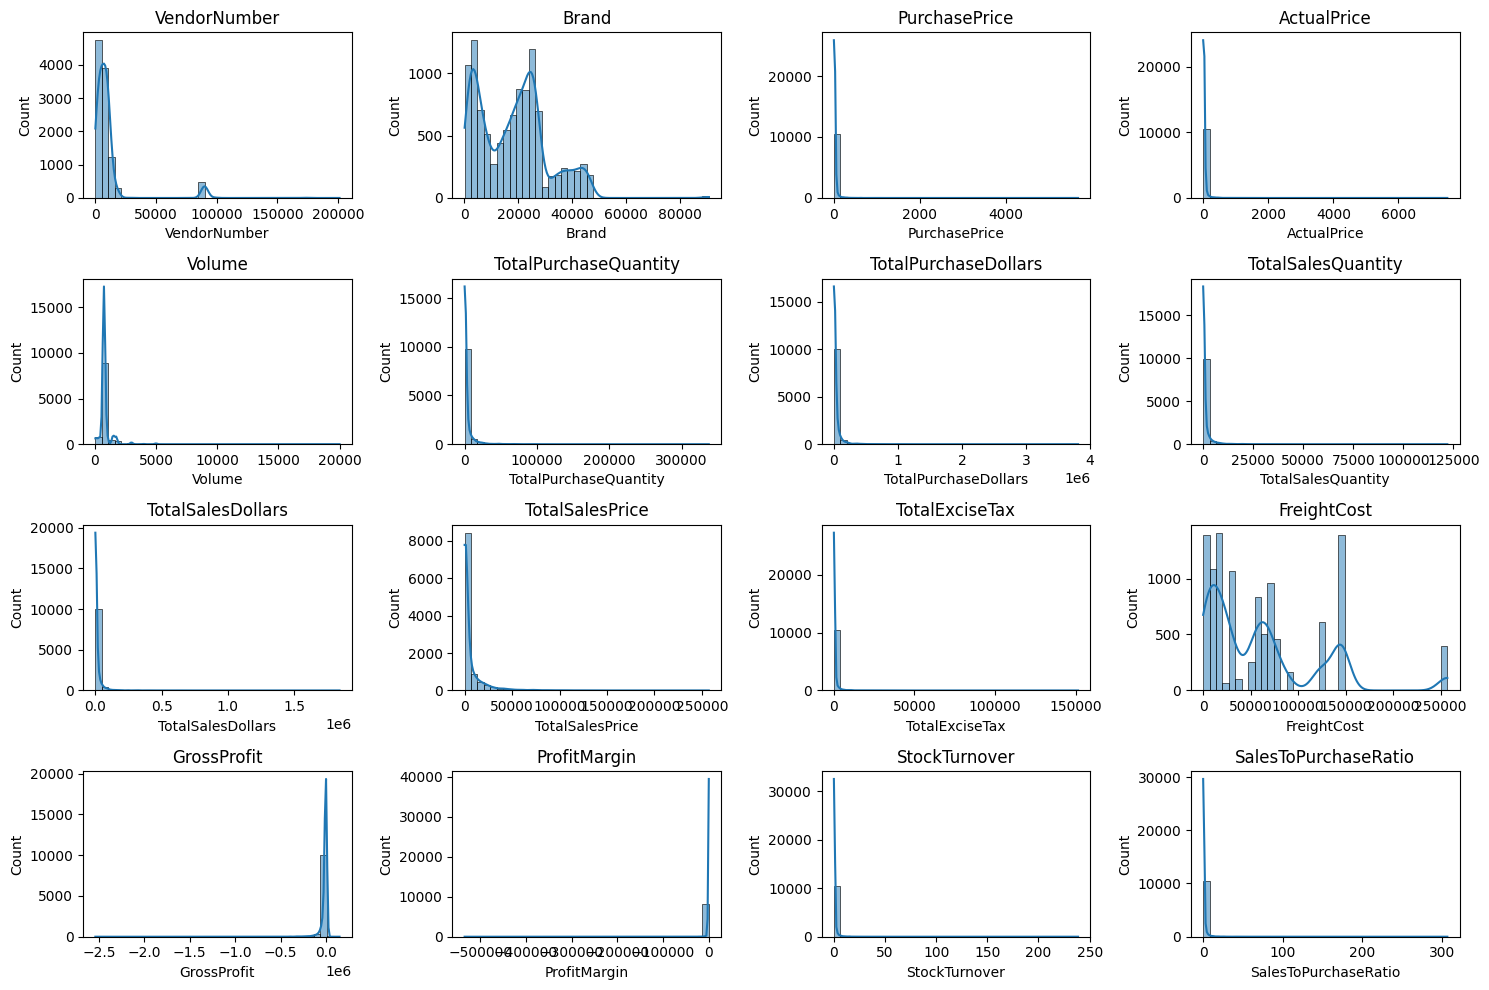

In [11]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=38)
    plt.title(col)

plt.tight_layout()
plt.show()


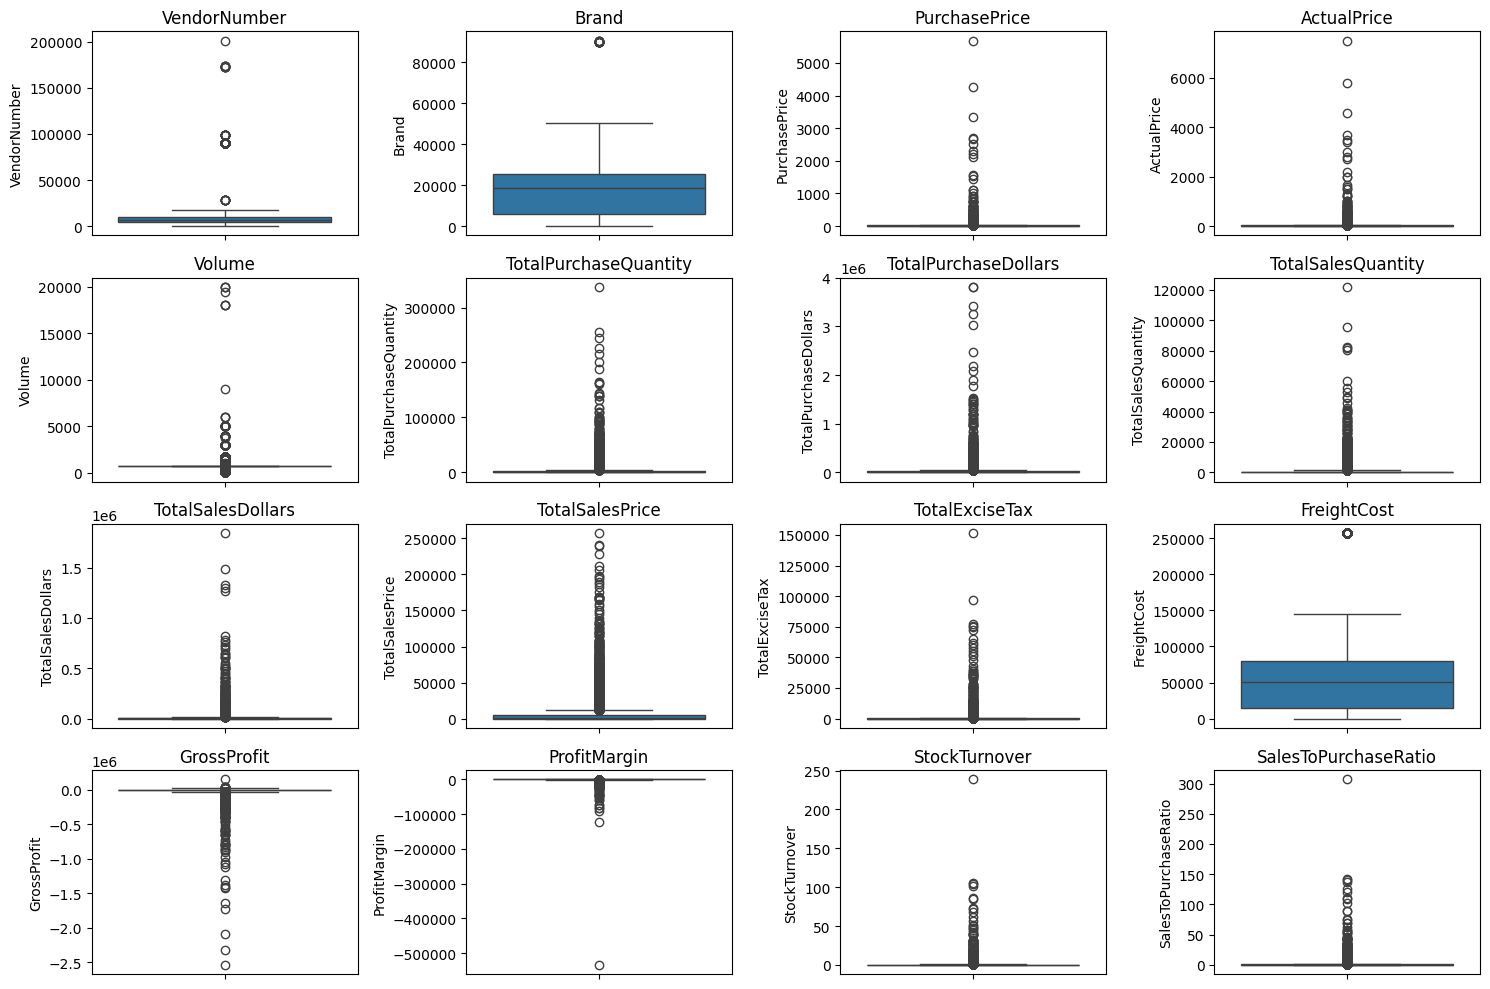

In [12]:
#Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [14]:
#let's filter the data by removing inconsistencies
df = pd.read_sql_query("""
SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0
""", conn)


In [15]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,5299,Southern Comfort,15.26,21.99,1750.0,15196,231890.96,11367.0,260100.33,104772.40,20885.87,68601.68,28209.37,10.845573,0.748026,1.121649
1,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,11569,185682.45,14690.0,334262.10,89091.78,26989.81,123880.97,148579.65,44.450044,1.269773,1.800181
2,4425,MARTIGNETTI COMPANIES,36380,Sebastiani Znfdl Sonoma Cnty,6.49,9.99,750.0,12309,79885.41,9151.0,91418.49,26133.84,1025.22,144929.24,11533.08,12.615697,0.743440,1.144370
3,4425,MARTIGNETTI COMPANIES,6526,Peter Lehmann Shiraz,5.29,18.99,750.0,10847,57380.63,9896.0,79300.04,18751.60,1109.77,144929.24,21919.41,27.641108,0.912326,1.382000
4,9165,ULTRA BEVERAGE COMPANY LLP,37821,Frescobaldi Sangiovese Remo,4.60,10.99,750.0,11000,50600.00,8979.0,62833.21,16825.01,1006.50,68054.70,12233.21,19.469338,0.816273,1.241763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,12.0,23.88,1.99,0.63,257032.07,21.04,88.107203,6.000000,8.408451
1748,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
1749,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
1750,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,18.0,35.82,15.92,3.78,257032.07,34.35,95.896147,18.000000,24.367347


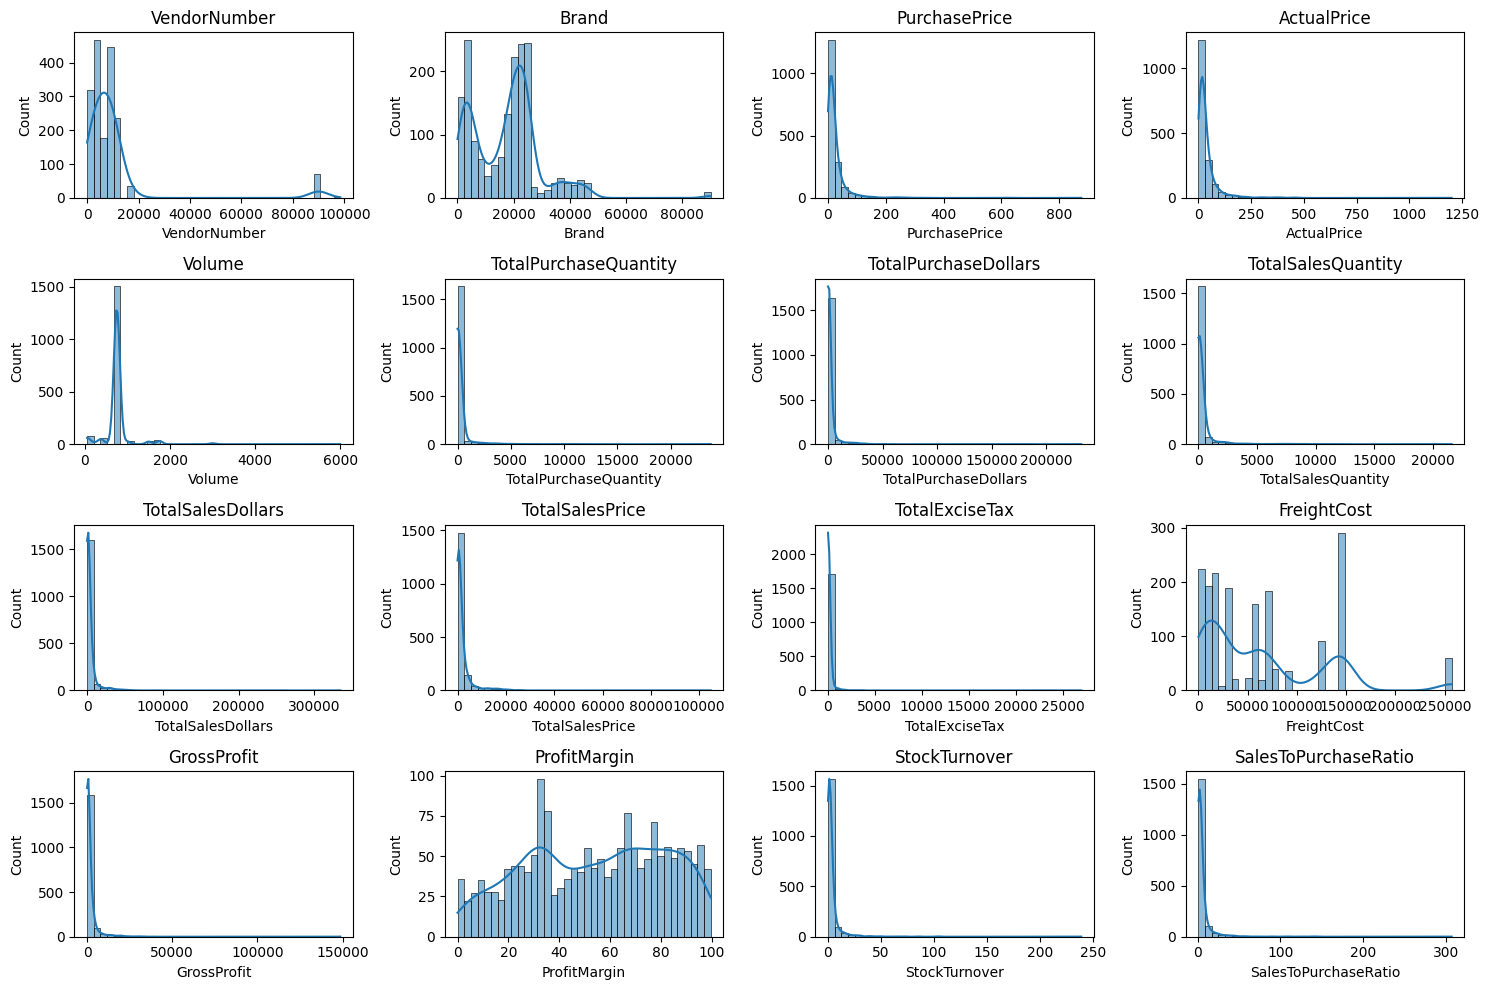

In [16]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=38)
    plt.title(col)

plt.tight_layout()
plt.show()

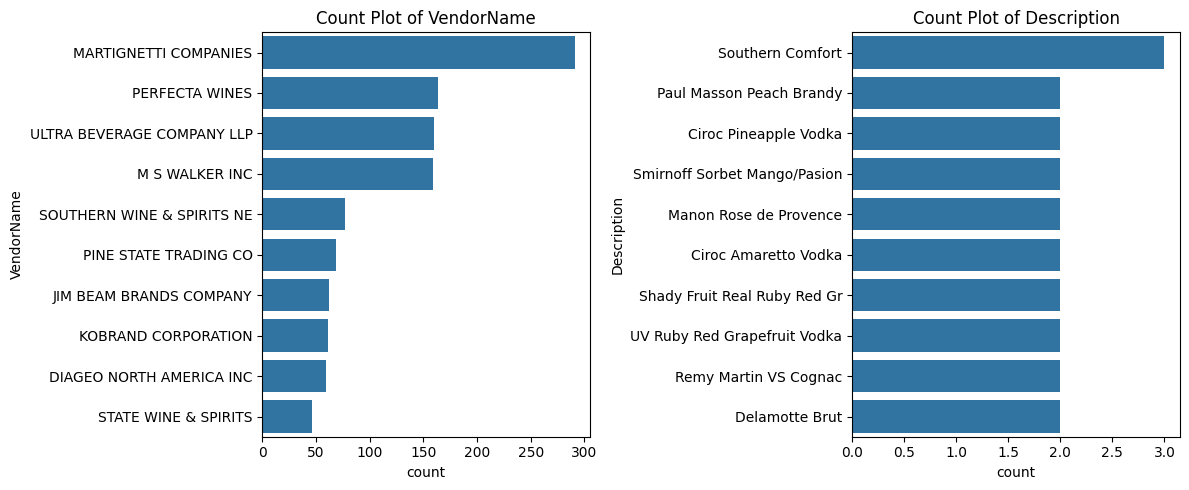

In [20]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    top_categories = df[col].value_counts().index[:10]  # Top 10 categories
    sns.countplot(y=df[col], order=top_categories)
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


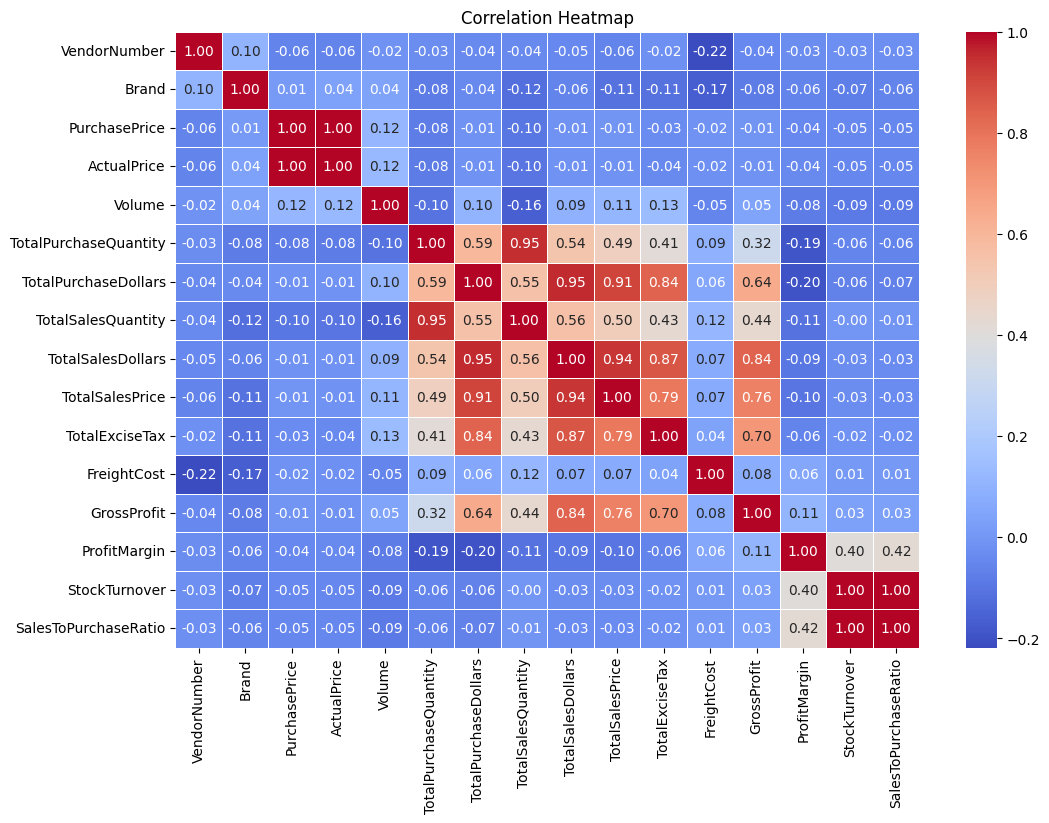

In [22]:
#Correlation Heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = df [numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [25]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [27]:
low_sales_threshold

np.float64(209.94)

In [28]:
high_margin_threshold

np.float64(86.20783183590439)

In [29]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance ['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance ['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
564,Crown Royal Apple,23.88,88.107203
1567,The Club Strawbry Margarita,35.82,95.896147
1380,Sauza Sparkling Margarita,41.94,87.172151
1614,Tracia Syrah,44.94,88.495772
1566,The Club Mudslide,55.72,86.988514
640,Dr McGillicuddy's Apple Pie,62.72,96.269133
1273,Promesses de France CdRhone,71.91,92.337644
77,Aresti Pnt Nr Curico Vly,84.83,96.133443
1587,Three Olives Grape Vodka,85.14,99.166079
1325,Riunite Sweet White,95.84,95.722037


In [36]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1000]

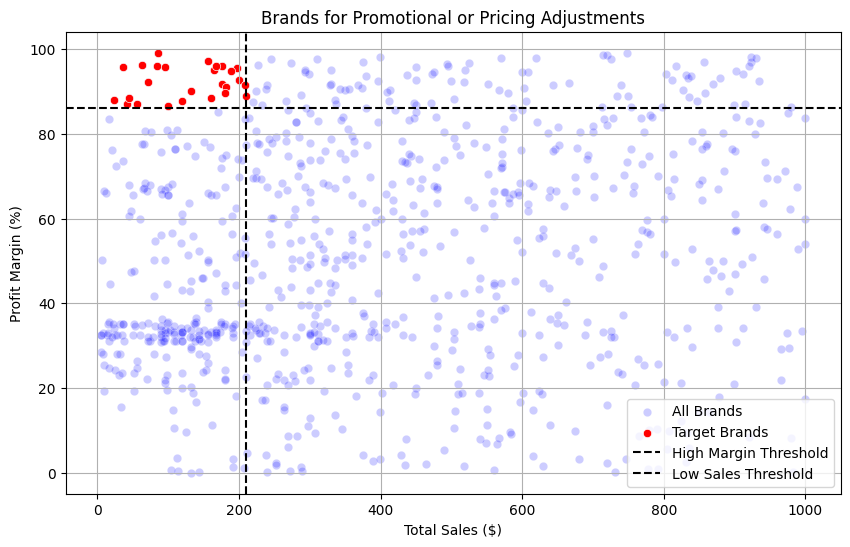

In [37]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
def format_dollars (value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value /11_000:.2f}K"
    else:
        return str(value)

In [44]:
#Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName") ["TotalSalesDollars"].sum().nlargest (10)
top_brands = df.groupby("Description") ["TotalSalesDollars"].sum().nlargest (10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         1271256.43
ULTRA BEVERAGE COMPANY LLP     865577.05
JIM BEAM BRANDS COMPANY        623987.41
BROWN-FORMAN CORP              464602.66
M S WALKER INC                 411742.55
PERFECTA WINES                 371184.11
DIAGEO NORTH AMERICA INC       255804.54
BACARDI USA INC                210216.75
STATE WINE & SPIRITS           199386.30
KOBRAND CORPORATION            161327.61
Name: TotalSalesDollars, dtype: float64

In [45]:
top_brands

Description
Southern Comfort                346197.04
Jim Beam Traveler               334262.10
Sebastiani Znfdl Sonoma Cnty     91418.49
Peter Lehmann Shiraz             79300.04
Frescobaldi Sangiovese Remo      62833.21
Hennessy VSOP Cognac + 50mL      56561.83
Schug Pnt Nr Carneros            54643.12
Colavita Pnt Nr                  51546.70
Turning Leaf RSV Cab Svgn        51533.16
Forefront Pine Ridge Znfdl       51437.10
Name: TotalSalesDollars, dtype: float64

In [46]:
top_brands.apply(lambda x : format_dollars(x))

Description
Southern Comfort                31.47K
Jim Beam Traveler               30.39K
Sebastiani Znfdl Sonoma Cnty     8.31K
Peter Lehmann Shiraz             7.21K
Frescobaldi Sangiovese Remo      5.71K
Hennessy VSOP Cognac + 50mL      5.14K
Schug Pnt Nr Carneros            4.97K
Colavita Pnt Nr                  4.69K
Turning Leaf RSV Cab Svgn        4.68K
Forefront Pine Ridge Znfdl       4.68K
Name: TotalSalesDollars, dtype: object

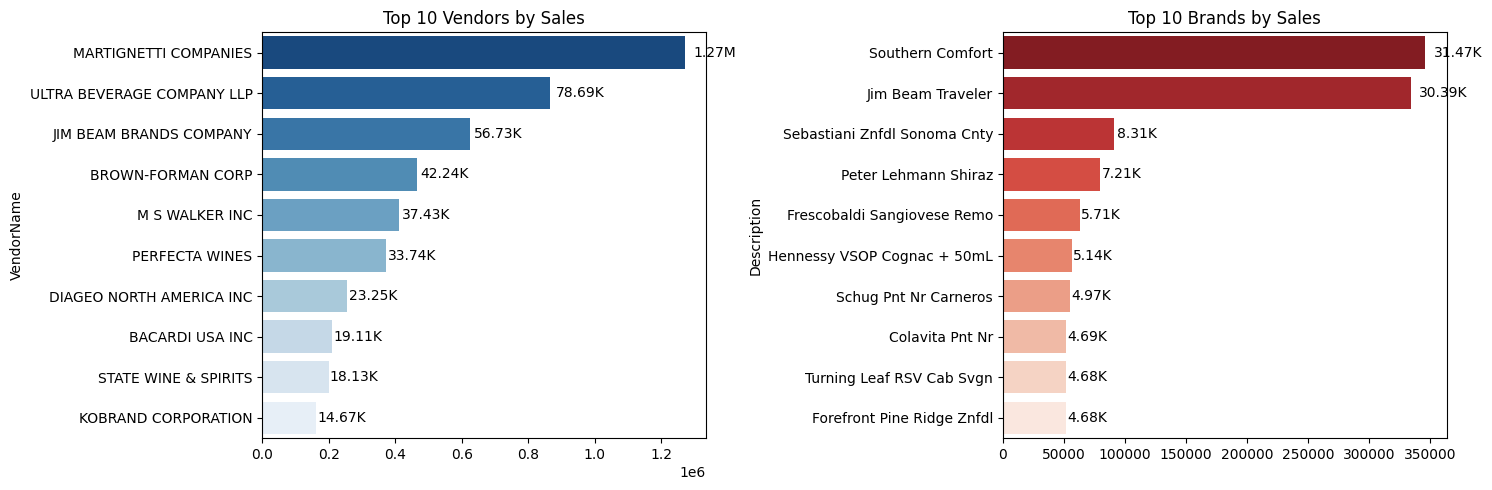

In [50]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [59]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(86, 4)

In [72]:
vendor_performance['PurchaseContribution%'] = vendor_performance ['TotalPurchaseDollars']/ vendor_performance ['TotalPurchaseDollars'].sum()*100

In [73]:
round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
37,MARTIGNETTI COMPANIES,690899.00,580357.43,1271256.43,18.68
76,ULTRA BEVERAGE COMPANY LLP,497859.82,367717.23,865577.05,13.46
27,JIM BEAM BRANDS COMPANY,360520.34,263467.07,623987.41,9.75
5,BROWN-FORMAN CORP,353345.25,111257.41,464602.66,9.56
47,PERFECTA WINES,223466.79,147717.32,371184.11,6.04
...,...,...,...,...,...
36,MARSALLE COMPANY,78.78,2421.83,2500.61,0.00
63,SILVER MOUNTAIN CIDERS,77.18,209.41,286.59,0.00
60,SEA HAGG DISTILLERY LLC,54.88,44.01,98.89,0.00
7,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [74]:
#Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors ['TotalSalesDollars'] = top_vendors ['TotalSalesDollars'].apply(format_dollars)
top_vendors ['TotalPurchaseDollars'] = top_vendors ['TotalPurchaseDollars'].apply(format_dollars)
top_vendors ['GrossProfit'] = top_vendors ['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ALISA CARR BEVERAGES,1.47K,1.21K,2.68K,0.436657
1,ATLANTIC IMPORTING COMPANY,0.29K,0.34K,0.64K,0.087366
2,BACARDI USA INC,6.82K,12.29K,19.11K,2.028041
3,BANFI PRODUCTS CORP,0.84K,0.43K,1.26K,0.248529
4,BLACK PRINCE DISTILLERY INC,0.39K,0.43K,0.82K,0.115964
5,BROWN-FORMAN CORP,32.12K,10.11K,42.24K,9.555390
6,CAMPARI AMERICA,0.92K,1.00K,1.93K,0.274804
7,CAPSTONE INTERNATIONAL,54.64,192.22999999999996,246.86999999999998,0.001478
8,CASTLE BRANDS CORP.,2.14K,2.53K,4.67K,0.636782
9,CONSTELLATION BRANDS INC,6.13K,5.15K,11.27K,1.823200


In [75]:
top_vendors['PurchaseContribution%'].sum()

np.float64(15.208210127050231)

In [76]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
0,ALISA CARR BEVERAGES,1.47K,1.21K,2.68K,0.436657,0.436657
1,ATLANTIC IMPORTING COMPANY,0.29K,0.34K,0.64K,0.087366,0.524023
2,BACARDI USA INC,6.82K,12.29K,19.11K,2.028041,2.552065
3,BANFI PRODUCTS CORP,0.84K,0.43K,1.26K,0.248529,2.800594
4,BLACK PRINCE DISTILLERY INC,0.39K,0.43K,0.82K,0.115964,2.916558
5,BROWN-FORMAN CORP,32.12K,10.11K,42.24K,9.555390,12.471948
6,CAMPARI AMERICA,0.92K,1.00K,1.93K,0.274804,12.746751
7,CAPSTONE INTERNATIONAL,54.64,192.22999999999996,246.86999999999998,0.001478,12.748229
8,CASTLE BRANDS CORP.,2.14K,2.53K,4.67K,0.636782,13.385010
9,CONSTELLATION BRANDS INC,6.13K,5.15K,11.27K,1.823200,15.208210


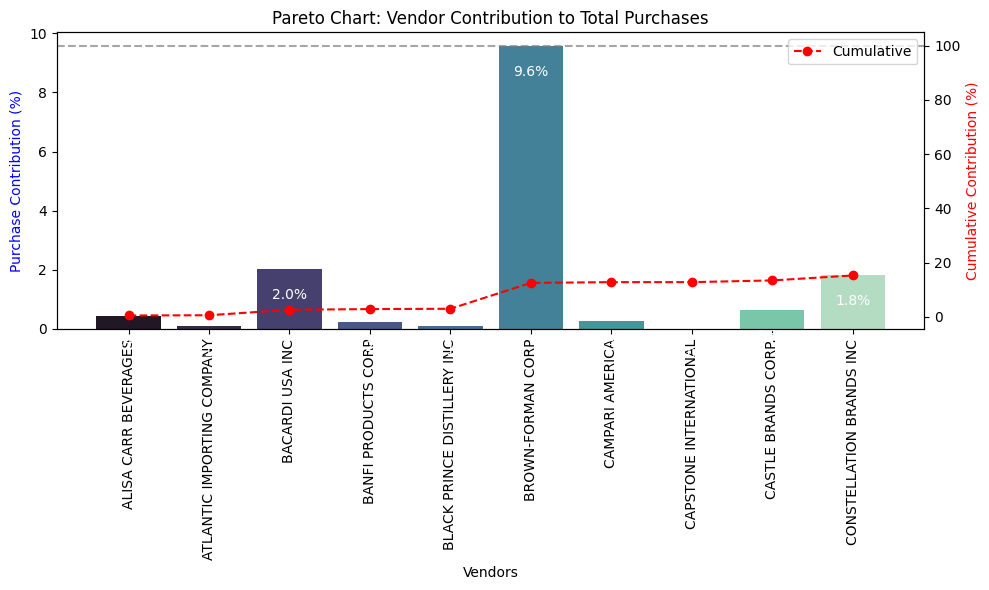

In [78]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contributions
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

# Axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Reference line and legend
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [80]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 15.21%


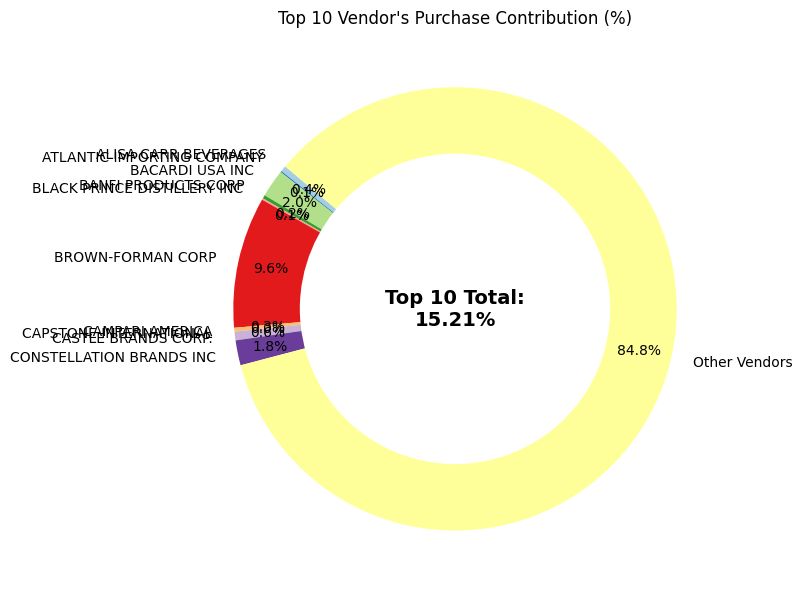

In [82]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.tight_layout()
plt.show()


In [83]:
df ['UnitPurchasePrice'] = df ['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [84]:

df ["OrderSize"] = pd.qcut(df ["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [85]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,37.916605
Medium,24.399657
Large,12.198795


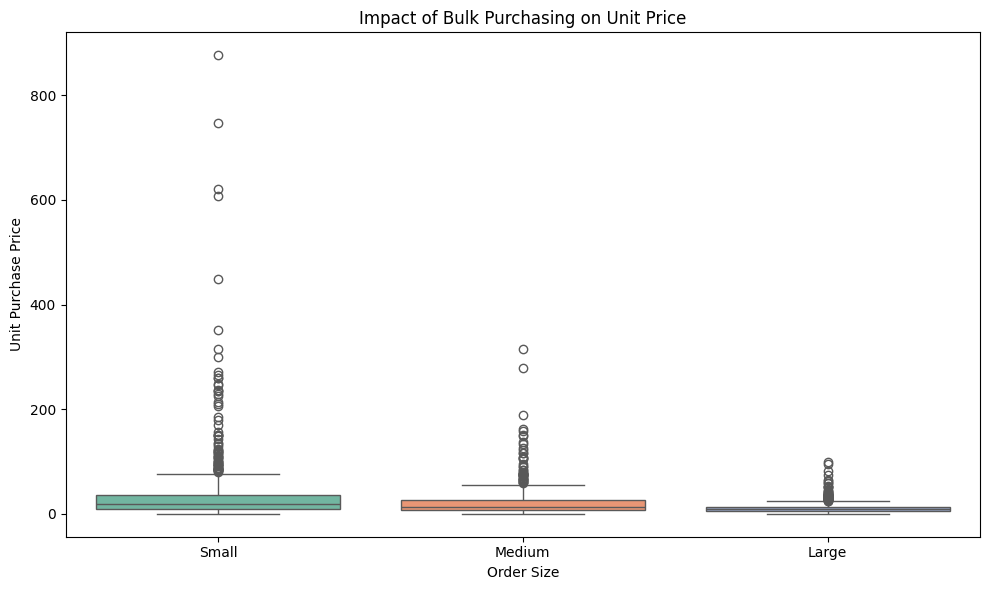

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.tight_layout()
plt.show()


In [92]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
THE IMPORTED GRAPE LLC,0.544246
FREDERICK WILDMAN & SONS,0.618079
SURVILLE ENTERPRISES CORP,0.619048
SHAW ROSS INT L IMP LTD,0.666667
WINE GROUP INC,0.666667
"STOLI GROUP,(USA) LLC",0.667966
PINE STATE TRADING CO,0.689224
R.P.IMPORTS INC,0.696970
LAIRD & CO,0.708333


In [95]:
df ["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"])*df ["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df ["UnsoldInventoryValue"].sum()))

Total Unsold Capital: -991892.1200000001


In [97]:
# Step 1: Check and create 'UnsoldInventoryValue' if needed
if 'UnsoldInventoryValue' not in df.columns:
    df['UnsoldInventoryValue'] = df['QuantityOnHand'] * df['UnitPurchasePrice']

# Step 2: Aggregate capital locked per vendor
inventory_value_per_vendor = (
    df.groupby("VendorName")["UnsoldInventoryValue"]
    .sum()
    .reset_index()
)

# Step 3: Sort vendors by highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(
    by="UnsoldInventoryValue", ascending=False
)

# Step 4: Format values as currency (assuming you have a format_dollars function)
inventory_value_per_vendor["FormattedValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

# Step 5: Display top 10 vendors
print(inventory_value_per_vendor.head(10))


                   VendorName  UnsoldInventoryValue     FormattedValue
5           BROWN-FORMAN CORP              32053.62              2.91K
22   FREDERICK WILDMAN & SONS              15354.02              1.40K
74      TREASURY WINE ESTATES               7162.43              0.65K
12     DELICATO VINEYARDS INC               5188.51              0.47K
69      STOLI GROUP,(USA) LLC               3898.90              0.35K
18         E & J GALLO WINERY                810.70  810.6999999999988
23   HEAVEN HILL DISTILLERIES                765.69  765.6900000000003
30    LABELLE VYDS AND WINERY                703.78  703.7800000000001
3         BANFI PRODUCTS CORP                659.74             659.74
70  SURVILLE ENTERPRISES CORP                259.62             259.62


In [98]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [99]:
top_threshold = df[df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_threshold = df[df["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

In [102]:
low_vendors = inventory_value_per_vendor.tail(10)


In [103]:
low_vendors

,VendorName,UnsoldInventoryValue,FormattedValue
33,LUXCO INC,-28371.93,-28371.93
48,PERNOD RICARD USA,-28921.81,-28921.81
64,SOUTHERN WINE & SPIRITS NE,-31099.10,-31099.1
66,STATE WINE & SPIRITS,-39231.39,-39231.39
14,DIAGEO NORTH AMERICA INC,-62610.72,-62610.72
2,BACARDI USA INC,-74134.43,-74134.43
34,M S WALKER INC,-93309.17,-93309.17
27,JIM BEAM BRANDS COMPANY,-94232.95,-94232.95
76,ULTRA BEVERAGE COMPANY LLP,-96387.38,-96387.38
37,MARTIGNETTI COMPANIES,-154716.92,-154716.91999999998


In [106]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (76.85, 78.48), Mean: 77.66
Low Vendors 95% CI: (29.18, 31.17), Mean: 30.18


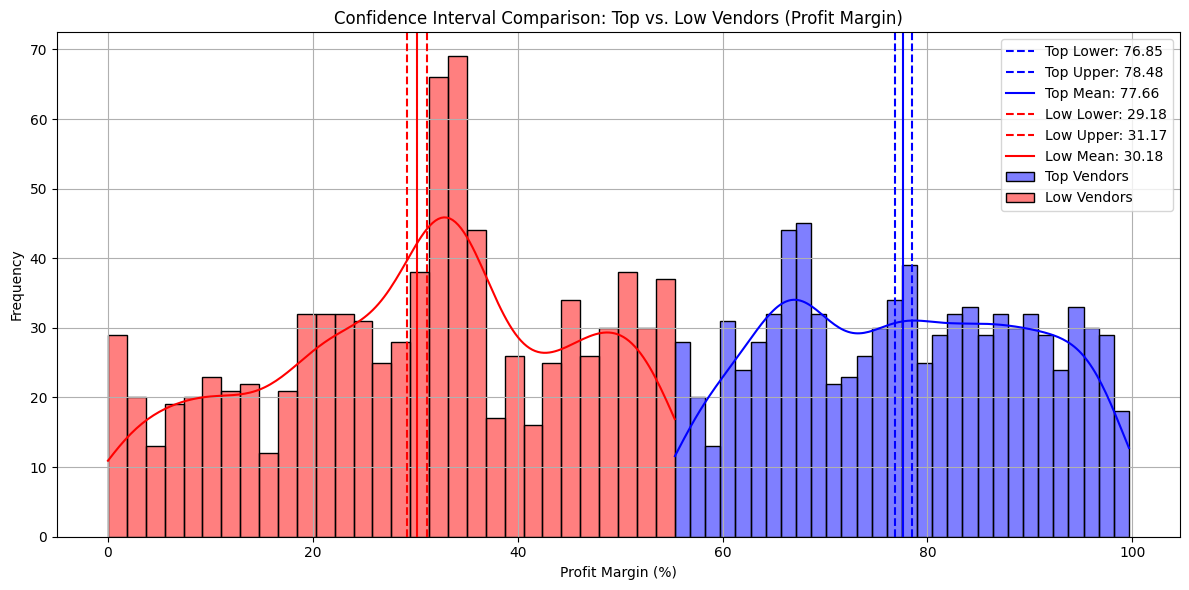

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Define the confidence interval function
def confidence_interval(series, confidence=0.95):
    series = pd.to_numeric(series, errors='coerce').dropna()
    mean = np.mean(series)
    sem = stats.sem(series)
    margin = stats.t.ppf((1 + confidence) / 2, df=len(series) - 1) * sem
    return mean, mean - margin, mean + margin

# Step 2: Filter top and low vendors by ProfitMargin
top_vendors = df[df["ProfitMargin"] > df["ProfitMargin"].median()]
low_vendors = df[df["ProfitMargin"] <= df["ProfitMargin"].median()]

# Step 3: Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors["ProfitMargin"])
low_mean, low_lower, low_upper = confidence_interval(low_vendors["ProfitMargin"])

# Step 4: Print results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Step 5: Plot histogram comparison
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors["ProfitMargin"], kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors["ProfitMargin"], kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Final touches
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [113]:
from scipy.stats import ttest_ind

# Correct quantile values
top_threshold = df["TotalSalesDollars"].quantile(0.875)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Filter top and low vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -1.0089, P-Value: 0.3136
Fail to Reject H₀: No significant difference in profit margins.


In [10]:
query = """
SELECT VendorName, SUM(TotalPurchaseDollars) AS TotalPurchaseDollars
FROM vendor_sales_summary
GROUP BY VendorName;
"""
PurchaseContribution = pd.read_sql_query(query, conn)


In [7]:
import pandas as pd
import sqlite3

# connect to db
conn = sqlite3.connect("inventory.db")

# load table
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary;", conn)

# summarize like DAX SUMMARIZE
PurchaseContribution = (
    df.groupby("VendorName", as_index=False)["TotalPurchaseDollars"].sum()
)

PurchaseContribution.head()


,VendorName,TotalPurchaseDollars
0,AAPER ALCOHOL & CHEMICAL CO,105.07
1,ADAMBA IMPORTS INTL INC,76770.25
2,ALISA CARR BEVERAGES,34951.68
3,ALTAMAR BRANDS LLC,11706.20
4,AMERICAN SPIRITS EXCHANGE,1205.16


In [11]:
import pandas as pd
import sqlite3

# connect to db
conn = sqlite3.connect("inventory.db")

# run SQL and load to DataFrame
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary;", conn)

# summarize like DAX SUMMARIZE
PurchaseContribution = (
    df.groupby("VendorName", as_index=False)["TotalPurchaseDollars"].sum()
)

# save to CSV
PurchaseContribution.to_csv("PurchaseContribution.csv", index=False)

# optional: preview inside Jupyter
PurchaseContribution.head()


,VendorName,TotalPurchaseDollars
0,AAPER ALCOHOL & CHEMICAL CO,105.07
1,ADAMBA IMPORTS INTL INC,76770.25
2,ALISA CARR BEVERAGES,34951.68
3,ALTAMAR BRANDS LLC,11706.20
4,AMERICAN SPIRITS EXCHANGE,1205.16


In [12]:
import pandas as pd
import sqlite3

# connect to db
conn = sqlite3.connect("inventory.db")

# load table into DataFrame
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary;", conn)

# Step 1: Filter rows where StockTurnover < 1
filtered_df = df[df["StockTurnover"] < 1]

# Step 2: Group by VendorName and calculate AvgStockTurnOver
LowTurnoverVendor = (
    filtered_df.groupby("VendorName", as_index=False)["StockTurnover"].mean()
)

# Rename the column like in DAX
LowTurnoverVendor.rename(columns={"StockTurnover": "AvgStockTurnOver"}, inplace=True)

# Step 3: Save to CSV (if needed)
LowTurnoverVendor.to_csv("LowTurnoverVendor.csv", index=False)

# Show preview in Jupyter
LowTurnoverVendor.head()


,VendorName,AvgStockTurnOver
0,AAPER ALCOHOL & CHEMICAL CO,0.000000
1,ADAMBA IMPORTS INTL INC,0.019156
2,ALISA CARR BEVERAGES,0.381037
3,ALTAMAR BRANDS LLC,0.389062
4,AMERICAN SPIRITS EXCHANGE,0.000000


In [13]:
import pandas as pd
import sqlite3

# connect to db
conn = sqlite3.connect("inventory.db")

# load table into DataFrame
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary;", conn)

# group by Description and calculate TotalSales & AvgProfitMargin
BrandPerformance = (
    df.groupby("Description", as_index=False)
      .agg(TotalSales=("TotalSalesDollars", "sum"),
           AvgProfitMargin=("ProfitMargin", "mean"))
)

# save to CSV
BrandPerformance.to_csv("BrandPerformance.csv", index=False)

# preview in Jupyter
BrandPerformance.head()


,Description,TotalSales,AvgProfitMargin
0,(RI) 1,8273.70,-113.116260
1,.nparalleled Svgn Blanc,0.00,-inf
2,10 Span Cab Svgn CC,1011.15,-111.418682
3,10 Span Chard CC,1243.34,-93.096016
4,10 Span Pnt Gris Monterey Cy,269.64,-423.364486
